# Advanced Algorithms

## Greedy Algorithms

### Introduction

### Min Platforms

### Min Operations

## Graph Algorithms

### Graphs
* Has Nodes & Edges
* Tree is a type of a graph
  * A binary tree is a type of tree
  * A BST is a type of binary tree
  
### Directions & Cycles
* Undirected vs. Directed Graph
* Cycles can lead to infinite loops
  * Acyclic: graph that has no loops
* Frequently encountered graph: Directed Acyclic Graph (DAG)

### Connectivity
* A disconnected graph has some vertex that can't be reached by the other vertices
* Connected components: Connected graphs themselves that have no connection between them

Connectivity
* Measures the minimum number of elements that need to be removed for a graph to become disconnected
* Depending on the context of the graph, one can sometimes use connectivity to measure which graph is stronger

### Graph Representation

#### Edge List
```python
[[0, 1], [1, 2], [1, 3], [2, 3]]
```

#### Adjacency List
Vertices have an ID number that corresponds to the index in the array. There is a list of nodes that the given node is connected to.
```python
[[1], [0, 2, 3], [1, 3], [1, 2]]
```

#### Adjacency Matrices
```python
[[0, 1, 0, 0],
 [1, 0, 1, 1],
 [0, 1, 0, 1],
 [0, 1, 1, 0]]
```

## Graph Traversal

### DFS
* Can be implemented using a stack or recursion.
* $O(|E| + |V|)$

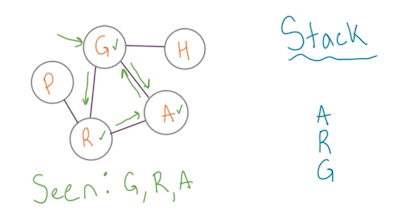

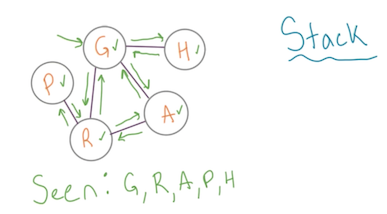

### DFS - Iterative Solution

### DFS - Recursive Solution

### BFS
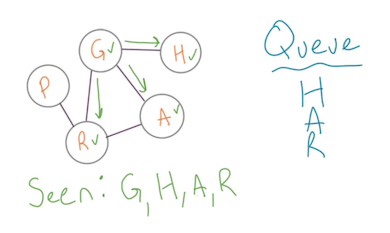
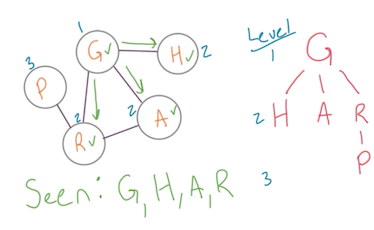
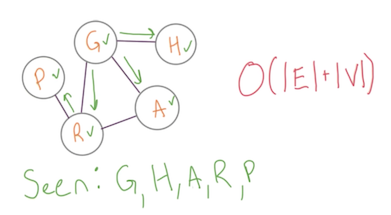


### Implement BFS

### Shortest Path & Dijkstra's Algorithm
Given a graph with weighted edges, find the shortest path where the sum of the edges is as small as possible. 

In an unweighted graph, the shortest path is the one with the fewest number of edges. 

Solution to the shortest path problem for an unweighted graph: BFS. 

#### Dijkstra's Algorithm
Solution to the shortest path problem for weighted undirected graphs: Dijkstra's Algorithm

* Give all vertices a distance value
  * Distance: sum of edge weights on a path between our starting point and the vertex we're on. 
  * At the end of the algorith, the distance will be the distance of the shortest path. 
  * The distance value we start with is infinity. It's a placeholder value that will update whenever we discover a node and have an actual distance to store. The node we're starting with has a distance of zero. 

A common implementation of Dijkstra's uses a min priority queue, where the element with a minimum priority, or minimum distance in our case, can be removed efficiently. 

We store all our nodes in the priority queue and use extract min to take out the minimum element (at first the only one with a distance of zero). 

From our starting node we have several options. Follow each edge and update the node on the other side with a distance value, which is just the weight of the edge. 

Next, pick the node with the smallest distance value. Because we always pick the node with the lowest distance, Dijkstra's is often called a greedy algorithm. 

Repeat the process visiting all adjacent nodes that are still in the queue and updating their distance values if we can decrease it at all. 

The basic runtime of Dijkstra's is the number of vertices squared: $O(|V|^2)$. Since in the worst case, we visit every node in the graph once or twice and every time we visit we need to search through the queue to find the minimum element. 

There are a lot of optimizations for Dijkstra's. If the priority queue is implemented really efficiently, the runtime looks more like this: $O(|E| + |V|*log(|V|))$.

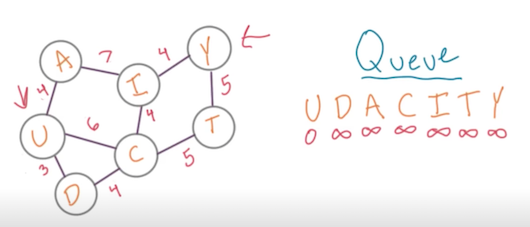
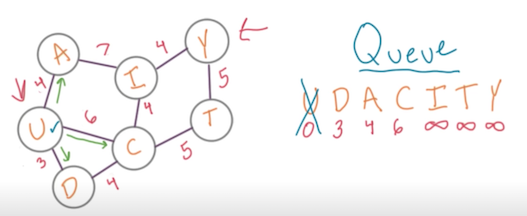
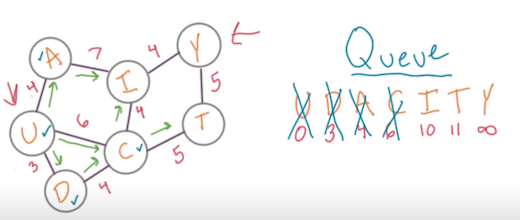

### Connecting Islands

## Dynamic Programming

### Knapsack Problem
Given:
* Theoretical knapsack with a limited weight capacity, and more items that can possibly fit in. 
* Each item has a weight and a value. 

How can I optimize the total value of items in my knapsack, given the weight constraint? 

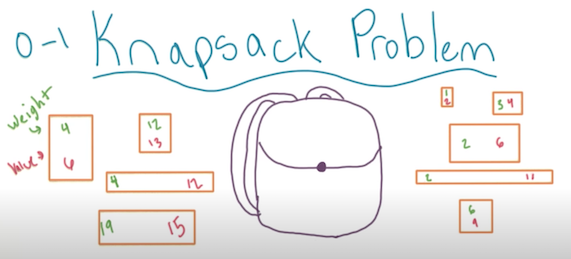

**0-1 knapsack problem:** You only have one of each object and must either take or leave a whole object. In some other variants, you can take a fraction of an object. 

**Brute Force solution:** Try every combination of objects and pick the one that's best. Runtime: $O(2^N)$
* There is a precise mathematical reason for the runtime of $O(2^N)$. But one can also think of one combination as a string of length $N$, where each spot has a `1` if it's in the knapsack or a `0` if it's left out. 
  * Example: "01001110"
  * This is an exponential time algorithm 

### Smarter Approach
Our first goal doesn't need to be "Max value for Max Weight". Instead, solve: "Max Value for Min Weight" and add them together until we have our maximum weight.



* Create an array that we'll use to store the maximum possible value for every weight up into the weight limit.
* Assumption: Weights are all positive integers, so the indices in the array represent those weights. 
* Initalize everything to zero.
* Go through the objects one by one. 

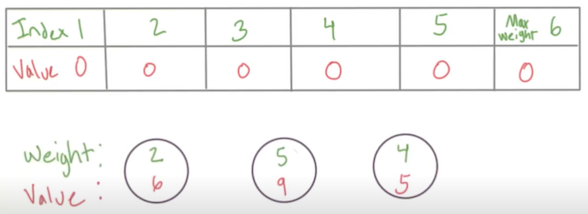

Take out the object with a weight of two. Update the value at index 2 to the value of the object. Update everything after it as well with the same value. Even if our knapsack can hold six, we've only seen one object so far, so we need to base that best value off one object.

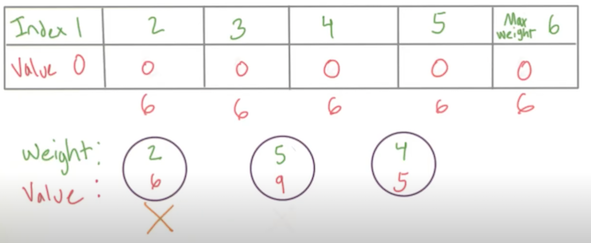

Look at the next object. We can't change anything until index 5. The value of this object is bigger than the max and it takes up the whole weight. So we replace the max value for weights five and six. 

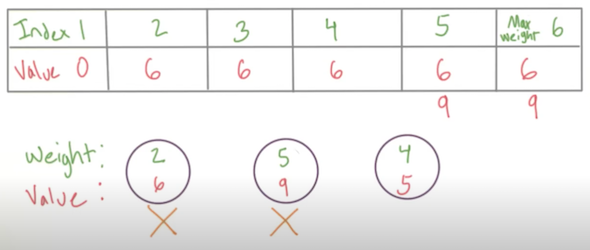

For the last object, the first thing we could possibly change is index four. 
* Index 4: The value at index 4 is 6, which is higher than the value in the object (5), so we don't change anything. 
* Index 5: Compare the value at index 5 with our value (5) plus the value at index one (0). The old value (9) is larger, so we leave it as it is. 
* Index 6: Add our object value (5) to the value at index 2 (6), and end up with a bigger value (11) than is stored at index 6 (9), so we replace it. 

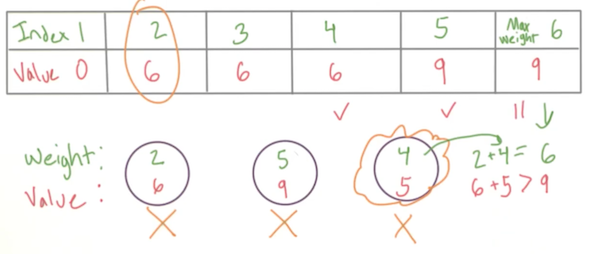

The solution to the problem is: Add first and third object into the Knapsack, achieve a total value of 11. 

We're taking advantage of the table to store precomputed maximum values. So we only need to do the work once to get those numbers. We go through every object and check if it can increase the maximum value of every possible weight up to our maximum weight. Thus, the runtime is $O(N*W)$, where $W$ is the weight limit of our knapsack, and $N$ is the number of elements. This is a pseudo-polynomial time solution. A true polynomial runtime wouldn't have a variable besides $N$. 

### Dynamic Programming
With dynamic programming, one can make a really complicated problem (e.g. knapsack) run much faster by breaking it into subproblems. 
* Problem: Max value for weight limit
* Subproblem: Max value for some smaller weight
* Base Case: Smallest computation (Compute values for one object)
  * The base case is a subproblem that is so small, that the answer is very simple or trivial to compute. 
  * Here, we started with one object. With only one thing to consider, finding the maximum possible value for any weight was simple. 
* Another common feature of a dynamic programming solution: lookup table that stores solutions to subproblems.
  * Here: We stored the maximum values for different weight limits in our lookup table. 

Dynamic programming solutions take advantage of these two things, solving the problem for a trivial case and storing the solution in a lookup table, by using them to slowly add complexity to a problem. 

Another feature of a dynamic programming solution is an equation used at each step as you add complexity. The equation often combines some values previously computed in the lookup table, sometimes with each other and sometimes with a new value you introduce, like the value of whatever object you're looking at. 

We used the values already stored in the table as we added new objects. This is a technique often called memoization. Ultimately, we didn't need to recompute them every time. 

**Memoization = Storing precomputed values**

This is the hidden power of dynamic programming. You compute and save solutions to smaller problems. Then you don't need to calculate them again for more complex problems. 

It might seem like a simple idea, but it can have a really powerful effect on efficiency if it's done well.

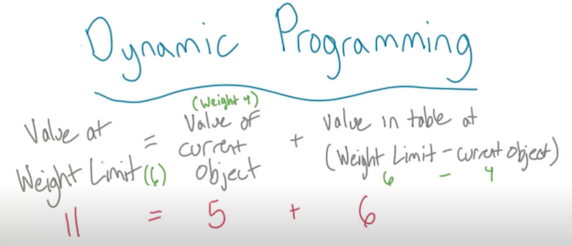
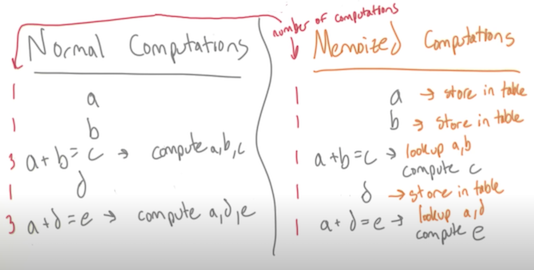

One of the most useful skills to have when going into a technical interview is the ability to spot a problem that has a dynamic programming solution.  

One thing you need to look out for is a complicated problem that seems to require trying every combination to find the solution. Ask yourself: "Can I break this problem up into subproblems?". If the answer is yes, then you've got a problem with a dynamic programming solution. 

### Knapsack Exercise

### Longest Common Subsequence 

### Longest Palindromic Subsequence

### The Coin Change Problem

### Stock Prices

## A*

#### Problem Definition

Description:
* Initial State that the agent starts out with: $s_0$
* Function `Actions(s)` that takes a state as input and returns a set of possible actions that the agent can execute when the agent is in this state. In some problems, the agent will have the same actions available in all states, and in other problems they'll have different actions dependent on the state. In the route finding problem, the actions are dependent on the state. 
* Function `Result(s, a)` that takes a state and an action and delivers as its output a new state. E.g. if you're in a given city (state) and take the action of taking a specific route (action), then the result of applying that action in that state would be the new state where the agent is (i.e. the new destination). 
* Function `GoalTest(s)` which takes a state and returns a boolean value, telling us if this state is a goal or not. 
* Function `PathCost` takes a path (a sequence of state, action, transitions) and returns a number, which is the cost of that path. 
  * For most of the problems we'll deal with, we'll make the Path Cost function be additive so that the cost of a path is just the sum of the cost of the individual steps. So, we'll implement this Path Cost function in terms of a Step Cost function:
* Function `StepCost(s, a, s')` takes a state, action, and the resulting state from that action and returns the number `n` which is the cost of that action. In the route finding example, the cost might be the number of miles traveled, or the number of minutes it takes to get to that destination.
  
Summary:
* Initial State $\rightarrow s_0$
* `Action(s)` $\rightarrow \{a_1, a_2, a_3, ...\}$
* `Result(s, a)` $\rightarrow$ `s'`
* `GoalTest(s)` $\rightarrow$ `True | False`
* `PathCost(`$s_i \rightarrow(a_j)\rightarrow s_{i+1} \rightarrow(a_{j+1}) \rightarrow s_{i+2}) \rightarrow$ cost value(n) where $i=0, 1, ...$, $j=1, 2, ...$
* `StepCost(s, a, s')` $\rightarrow$ `n`

### Route Finding
* State Space: Set of all states
  * We navigate the state space by applying actions
  * Actions are specific to each state (here: city)
* As we follow roads/actions, we build paths (sequences of actions)
* At every point, we want to separate the state out into three parts:
  * The ends of the paths (the farthest path that have been explored), called the frontier
    * The frontier consists of the states from the set of explored states that are the farthest out. 
  * The explored part of the state space
  * The unexplored part of the state space
* Step cost: distance/time between states (cities)
* Path cost: sum of step costs

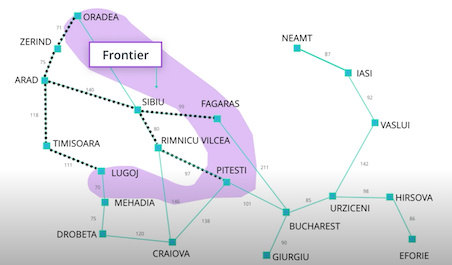
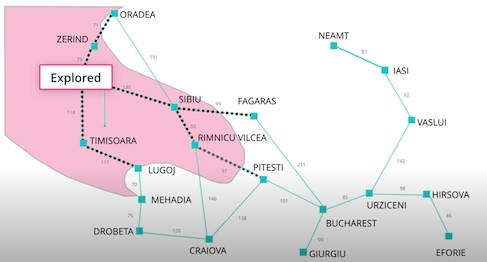

### Uniform Cost Search
An algorithm that has traditionally been called Uniform Cost Search, but could be called Cheapest First Search, is guaranteed to find the path with the cheapest total cost.

* Start in the start state: Pop the empty path off, move it from the frontier to explored, and then add in the path out of that state.
* Pick the path with the total lowest cost
* Even if we reach the goal, we are going to keep searching all the other paths to see if there's a path that's cheaper. This is usually achieved by always popping off the cheapest path anyways, until we pop off the goal

### On Uniform Cost
The current algorithm explores the state spaces in an expanding circle around the start state. This is too slow for path finding.

In order to speed up the search, we need to add more knowledge: the estimated distance between start and goal state.

Greedy best-first search utilizes the estimate to expand first the path that's closest to the goal according to the estimate. 

* Uniform Cost Search
  * Expands out equally in all directions, may expend additional effort getting to a fairly direct path to the goal
* Greedy best-first search
  * Expands outward toward locations estimated as closer to the goal. If a direct path is available, expends much less effort than Uniform Cost; however it does not consider any routes in which it may need to temporarily take a further away path in order to arrive at an overall shorter path.
* A* Search
  * Utilizes both of these - will try to optimize with both the shortest path and the goal in mind.

### A* Search
A* Search always expandes the path that has a minimum value of the function $f=g + h$, which is defined as a sum of the `g` and `h` components. The funtion `g(path)` is just the cost of the path. The function `h(path)` is the h value of the state, which is the final state of the path, which is equal to the estimated distance to the goal. 

Minimum Value
* `f = g + h`
* `g(path) = path cost`
* `h(path) = h(s) = esimated distance to goal`

* Minimizing `g` helps us keep the path short. 
* Minimizing `h` helps us keep focused on finding the goal. 

A* $\rightarrow$ Best estimated total path cost first

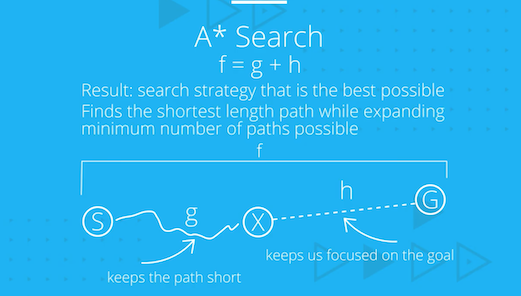

A* search will find the lowest cost path if $h(s) <$ true cost of the path to the goal through that state. `h` should never overestimate the distance to the goal (=`h` is optimistic, `h` is admissible to use it to find the lowest cost path).

## Route Planner